In [308]:
# 1. Συνδέουμε το Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Το σωστό path του αρχείου
csv_path = '/content/drive/MyDrive/ML Project/players_21.csv'

# Φορτώνουμε το αρχείο CSV
df = pd.read_csv(csv_path)

# Εμφανίζουμε τις πρώτες 5 γραμμές
df.head()


In [310]:
# Επιλέγουμε τις στήλες που θέλουμε
selected_columns = ['age', 'height_cm', 'weight_kg', 'short_name', 'nationality', 'club_name', 'overall']
df_selected = df[selected_columns].dropna()

# Εμφάνιση πρώτων γραμμών για έλεγχο
df_selected.head()


,age,height_cm,weight_kg,short_name,nationality,club_name,overall
0,33,170,72,L. Messi,Argentina,FC Barcelona,93
1,35,187,83,Cristiano Ronaldo,Portugal,Juventus,92
2,27,188,87,J. Oblak,Slovenia,Atlético Madrid,91
3,31,184,80,R. Lewandowski,Poland,FC Bayern München,91
4,28,175,68,Neymar Jr,Brazil,Paris Saint-Germain,91


In [311]:
from sklearn.preprocessing import LabelEncoder

# Κάνουμε encoding τα κατηγορικά πεδία
le_nat = LabelEncoder()
le_club = LabelEncoder()

df_selected['nationality'] = le_nat.fit_transform(df_selected['nationality'])
df_selected['club_name'] = le_club.fit_transform(df_selected['club_name'])


In [312]:
from sklearn.model_selection import train_test_split

# Ορίζουμε X (features) και y (στόχος)
X = df_selected.drop('overall', axis=1)
y = df_selected['overall']

# Χώρισμα σε training και testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [313]:
# Φτιάχνουμε σωστά τα X και y χωρίς το short_name
X = df_selected.drop(['overall', 'short_name'], axis=1)
y = df_selected['overall']

# Διαχωρισμός training/testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



✅ Accuracy: 0.896

📊 Classification Report:
               precision    recall  f1-score   support

         Low       0.90      0.99      0.94      3345
         Top       0.60      0.07      0.13       399

    accuracy                           0.90      3744
   macro avg       0.75      0.53      0.54      3744
weighted avg       0.87      0.90      0.86      3744



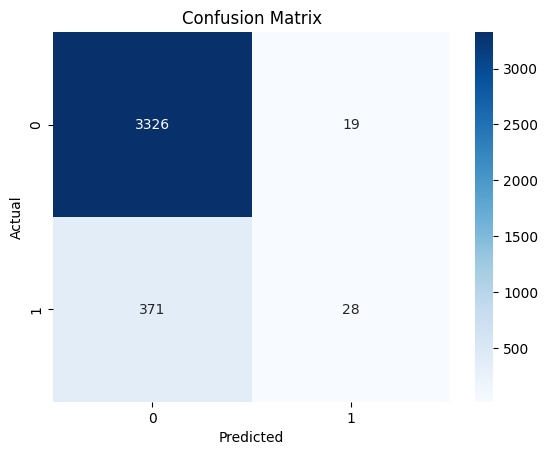

['model.pkl']

In [320]:
# 📦 Εισαγωγές
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Φόρτωση αρχείου (π.χ. FIFA21)
df = pd.read_csv('/content/drive/MyDrive/ML Project/players_21.csv')  # άλλαξε το path αν είσαι αλλού

# ✅ Επιλογή απαραίτητων στηλών
columns_to_use = ['overall', 'short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name']
df_selected = df[columns_to_use].dropna()


# 🔢 Μετατροπή 'overall' σε κατηγορίες
def categorize_rating(overall):
    if overall >= 75:
        return "Top"
    else:
        return "Low"

df_selected['rating_category'] = df_selected['overall'].apply(categorize_rating)

# 🧬 Μετατροπή κατηγορικών δεδομένων (Label Encoding)
le_nat = LabelEncoder()
le_club = LabelEncoder()

le_nat.fit(df['nationality'])
le_club.fit(df['club_name'])

df_selected['nationality'] = le_nat.fit_transform(df_selected['nationality'])
df_selected['club_name'] = le_club.fit_transform(df_selected['club_name'])

# 🎯 Ορισμός χαρακτηριστικών (X) και στόχου (y)
X = df_selected.drop(['overall', 'short_name', 'rating_category'], axis=1)
y = df_selected['rating_category']

# ✂️ Διαχωρισμός σε training και test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🌲 Εκπαίδευση Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# 📊 Αξιολόγηση μοντέλου
y_pred = clf.predict(X_test)
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()
import joblib
joblib.dump(model, 'model.pkl')

